In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

damage19_path = "Resources/2019_fire_damages.csv"
damage18_path = "Resources/2018_fire_damage.csv"
damage17_path = "Resources/2017_fire_damage.csv"
damage16_path = "Resources/2016_fire_damage.csv"
damage19_df = pd.read_csv(damage19_path)
damage18_df = pd.read_csv(damage18_path)
damage17_df = pd.read_csv(damage17_path)
damage16_df = pd.read_csv(damage16_path)

In [13]:
# clean dataframes
nine_df = damage19_df.drop(labels = [0, 13, 14, 24, 25], axis = 0)
eight_df = damage18_df.drop(labels = [0, 13, 14, 24, 25], axis = 0)
seven_df = damage17_df.drop(labels = [0, 13, 14, 24, 25], axis = 0)
six_df = damage16_df.drop(labels = [0, 13, 14, 24, 25], axis = 0)

In [14]:
# Compare damage of each county by year
# Add year column to each df and then get region, region total, and year
year19 = nine_df[['Region', 'Region Total']]
year19 = year19.rename(columns = {'Region Total':'2019 Region Total'})
year18 = eight_df['Region Total']
year17 = seven_df['Region Total']
year16 = six_df['Region Total']
year19['2018 Region Total'] = year18
year19['2017 Region Total'] = year17
year19['2016 Region Total'] = year16

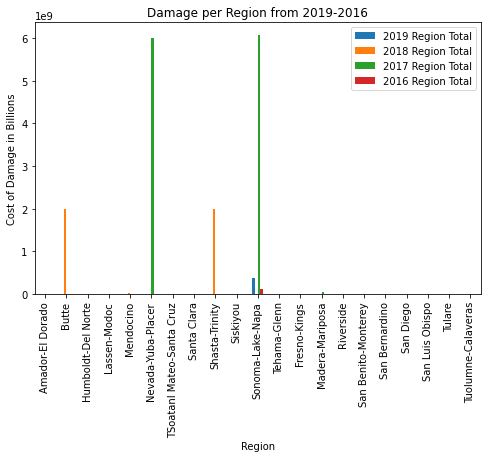

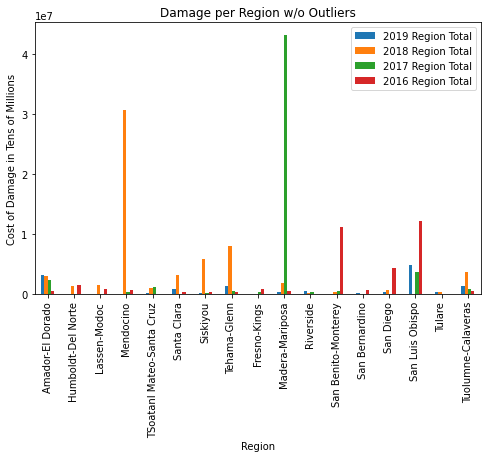

In [15]:
# plot
year19.plot(x="Region", y=["2019 Region Total", "2018 Region Total", "2017 Region Total",
                           "2016 Region Total"], kind="bar", figsize = (8, 5))
plt.title("Damage per Region from 2019-2016")
plt.xlabel("Region")
plt.ylabel("Cost of Damage in Billions")
plt.show()

# plot with no outliers
year19_normal = year19.drop(labels = [2, 6, 9, 11], axis = 0)
year19_normal.plot(x="Region", y=["2019 Region Total", "2018 Region Total", "2017 Region Total",
                           "2016 Region Total"], kind="bar", figsize = (8, 5))
plt.title("Damage per Region w/o Outliers")
plt.xlabel("Region")
plt.ylabel("Cost of Damage in Tens of Millions")
plt.show()

In [16]:
# Every year there seems to be a region that gets hit harder than other regions in terms of wildfire
# damage. However, the Sonoma-Lake-Napa region has cumulated enough costs to be featured three times
# in the first plot. Because the first plot shows costs in trillions versus the billions in the second,
# the fact that one region is shown three times makes it obvious that Sonoma is a hot spot for wildfires.
# Outliers for the second plot can be seen as specks in the first. The only other region where more than one
# bar is visible is Butte, which might be another region that could be susceptible to wildfires.

In [17]:
# Biggest Causes of Wildfire Damage

# make dataframe with cause totals
df1 = damage19_df.drop(columns = ['Region', 'Region Total'])
total_cause19 = pd.DataFrame(df1.loc[25,:])
total_cause19 = total_cause19.rename(columns = {25:'2019 State Total'})

df2 = damage18_df.drop(columns = ['Region', 'Region Total'])
total_cause18 = pd.DataFrame(df2.loc[25,:])
total_cause18 = total_cause18.rename(columns = {25:'2018 State Total'})

df3 = damage17_df.drop(columns = ['Region', 'Region Total'])
total_cause17 = pd.DataFrame(df3.loc[25,:])
total_cause17 = total_cause17.rename(columns = {25:'2017 State Total'})

df4 = damage16_df.drop(columns = ['Region', 'Region Total'])
total_cause16 = pd.DataFrame(df4.loc[25,:])
total_cause16 = total_cause16.rename(columns = {25:'2016 State Total'})

cause_damages = pd.concat([total_cause19, total_cause18, total_cause17, total_cause16], axis = 1)

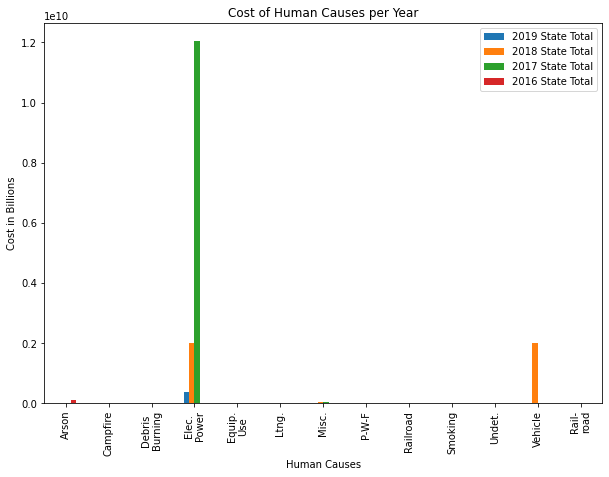

In [18]:
# plot
cause_damages.plot.bar(figsize = (10, 7))
plt.xlabel("Human Causes")
plt.ylabel("Cost in Billions")
plt.title("Cost of Human Causes per Year")
plt.show()

In [19]:
# This graph shows which human causes seem to cause the most wildfire damage from years 2019-2016. Obviously, electric power
# is the causes the most wildfire damage, with three years of electric power causing the most damage. The second would be
# from vehicular accidents. The third would be from either Arson or a miscellaneous cause. 

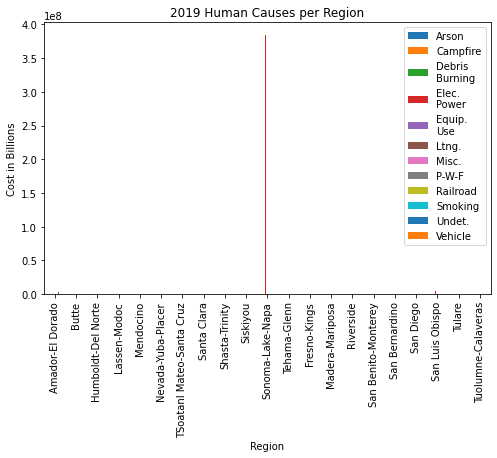

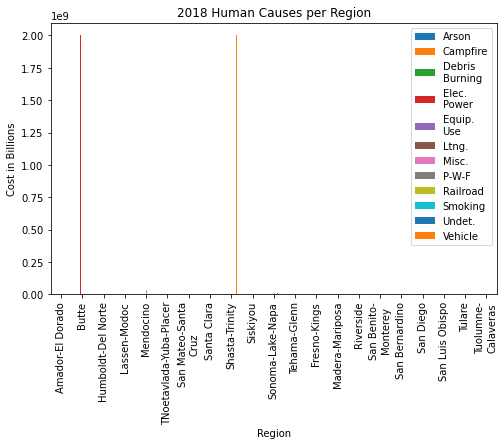

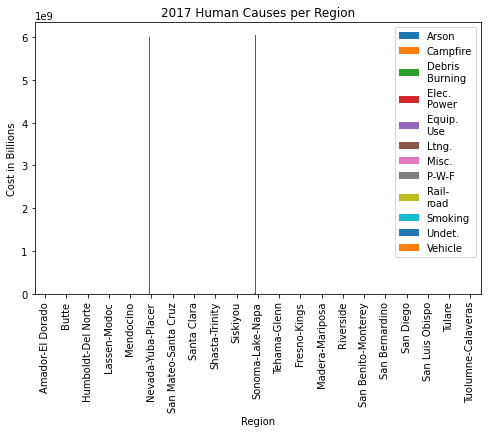

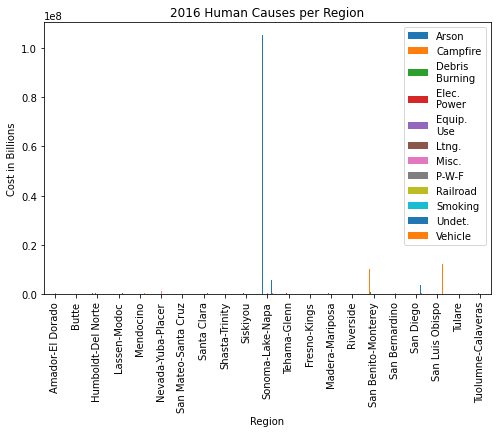

In [23]:
# Plot human causes per region
# 2019
nine_df2 = nine_df.drop(columns = ['Region Total'])
nine_df2.plot.bar(x = 'Region', figsize = (8, 5))
plt.xlabel("Region")
plt.ylabel("Cost in Billions")
plt.title("2019 Human Causes per Region")
plt.show()
# 2018
eight_df2 = eight_df.drop(columns = ['Region Total'])
eight_df2.plot.bar(x = 'Region', figsize = (8, 5))
plt.xlabel("Region")
plt.ylabel("Cost in Billions")
plt.title("2018 Human Causes per Region")
plt.show()
# 2017
seven_df2 = seven_df.drop(columns = ['Region Total'])
seven_df2.plot.bar(x = 'Region', figsize = (8, 5))
plt.xlabel("Region")
plt.ylabel("Cost in Billions")
plt.title("2017 Human Causes per Region")
plt.show()
# 2016
six_df2 = six_df.drop(columns = ['Region Total'])
six_df2.plot.bar(x = 'Region', figsize = (8, 5))
plt.xlabel("Region")
plt.ylabel("Cost in Billions")
plt.title("2016 Human Causes per Region")
plt.show()

In [24]:
# These sets of graphs show the major human causes per unit from 2019-2016. These graphs show similar
# results to the previous graphs: Sonoma-Lake-Napa seems to be the most common region for costly
# wildfires, with electric power, arson, and vehicular use being the top reasons for wildfires.